# Лабораторная работа №4
## Линейные модели, SVM и деревья решений

### Задание:
1. Выберите набор данных (датасет) для решения задачи классификации или регрессии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите следующие модели:
    - одну из линейных моделей (линейную или полиномиальную регрессию при решении задачи регрессии, логистическую регрессию при решении задачи классификации);
    - SVM;
    - дерево решений.
5. Оцените качество моделей с помощью двух подходящих для задачи метрик. Сравните качество полученных моделей.
6. Постройте график, показывающий важность признаков в дереве решений.
7. Визуализируйте дерево решений или выведите правила дерева решений в текстовом виде.

В качестве исходных данных возьмём датасет расхода топлива автомобилей в Канаде 2022 года
В этой лабораторной работе будем решать задачу классификации
Целевой признак - Cylinders

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score
from sklearn.tree import DecisionTreeClassifier
import graphviz 
from sklearn.tree import export_graphviz
from sklearn import tree
from operator import itemgetter

In [26]:
data = pd.read_csv("Fuel.csv")

In [27]:
#Первые 5 записей датасета
data.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


In [28]:
#Проверка наличия пустых значений
data.isnull().sum()

Model Year                           0
Make                                 0
Model                                0
Vehicle Class                        0
Engine Size(L)                       0
Cylinders                            0
Transmission                         0
Fuel Type                            0
Fuel Consumption (City (L/100 km)    0
Fuel Consumption(Hwy (L/100 km))     0
Fuel Consumption(Comb (L/100 km))    0
Fuel Consumption(Comb (mpg))         0
CO2 Emissions(g/km)                  0
CO2 Rating                           0
Smog Rating                          0
dtype: int64

In [29]:
#Размер исходного датасета
data.shape

(946, 15)

In [30]:
#Проверка типов
data.dtypes

Model Year                             int64
Make                                  object
Model                                 object
Vehicle Class                         object
Engine Size(L)                       float64
Cylinders                              int64
Transmission                          object
Fuel Type                             object
Fuel Consumption (City (L/100 km)    float64
Fuel Consumption(Hwy (L/100 km))     float64
Fuel Consumption(Comb (L/100 km))    float64
Fuel Consumption(Comb (mpg))           int64
CO2 Emissions(g/km)                    int64
CO2 Rating                             int64
Smog Rating                            int64
dtype: object

In [31]:
#Удаление ненужных столбцов
data = data.drop(columns=["Model", "Model Year"], axis=1)

In [32]:
#Кодирование категориальных признаков
LE = LabelEncoder()
for column in ["Fuel Type","Make", "Vehicle Class", "Transmission"]:
    data[column] = LE.fit_transform(data[column])

<AxesSubplot:>

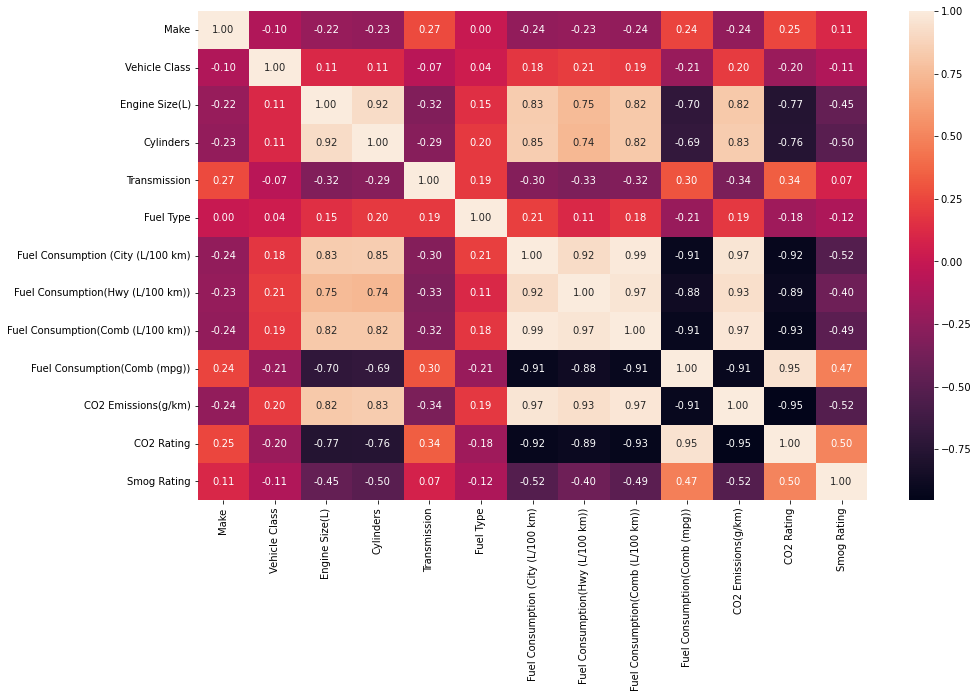

In [33]:
fig, ax = plt.subplots(figsize=(15,9))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [34]:
#Выделяем записи, где присутствуют 4 или 6 цилиндров
#Для бинарной классификации
data = data.loc[data["Cylinders"].isin([4,6])]
data.shape

(699, 13)

In [35]:
xArray = data.drop("Cylinders", axis=1)
yArray = data["Cylinders"]

In [36]:
#Разделяем выборку для обучения модели
trainX, testX, trainY, testY = train_test_split(xArray, yArray, test_size=0.2, random_state=1)

## Линейная регрессия

In [37]:
#Обучение модели
LR = LogisticRegression()
LR.fit(trainX, trainY)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
#Предсказание целевого признака
predict = LR.predict(testX)
predict

array([6, 6, 4, 6, 6, 4, 6, 4, 4, 4, 4, 6, 6, 6, 4, 4, 6, 4, 4, 4, 4, 6,
       4, 4, 4, 6, 6, 4, 6, 4, 4, 6, 6, 4, 6, 4, 6, 6, 6, 4, 6, 6, 6, 6,
       4, 6, 4, 4, 4, 6, 4, 4, 6, 6, 4, 4, 6, 6, 6, 6, 6, 6, 6, 4, 6, 4,
       4, 6, 4, 4, 6, 6, 4, 4, 6, 6, 6, 4, 4, 4, 6, 4, 4, 6, 6, 4, 4, 4,
       4, 4, 4, 4, 6, 6, 6, 4, 6, 4, 6, 4, 6, 6, 4, 4, 6, 4, 4, 4, 6, 6,
       4, 4, 6, 6, 4, 4, 4, 4, 6, 6, 6, 4, 4, 4, 4, 6, 4, 4, 6, 6, 6, 4,
       4, 4, 4, 4, 6, 6, 6, 4], dtype=int64)

In [39]:
#Вычисление вероятности попадания в той или иной класс
predictpr = LR.predict_proba(testX)
predictpr

array([[9.89144089e-02, 9.01085591e-01],
       [1.72492351e-02, 9.82750765e-01],
       [9.79594360e-01, 2.04056401e-02],
       [1.05608870e-02, 9.89439113e-01],
       [1.46493106e-01, 8.53506894e-01],
       [9.98315700e-01, 1.68429986e-03],
       [3.63899455e-03, 9.96361005e-01],
       [5.26785162e-01, 4.73214838e-01],
       [9.96458452e-01, 3.54154839e-03],
       [9.93006653e-01, 6.99334657e-03],
       [9.99996677e-01, 3.32323644e-06],
       [5.00806757e-02, 9.49919324e-01],
       [9.63162024e-02, 9.03683798e-01],
       [1.25412220e-01, 8.74587780e-01],
       [9.99698106e-01, 3.01894226e-04],
       [9.80460978e-01, 1.95390224e-02],
       [2.47924207e-03, 9.97520758e-01],
       [9.47786291e-01, 5.22137094e-02],
       [9.09163301e-01, 9.08366994e-02],
       [9.94459334e-01, 5.54066598e-03],
       [9.95723692e-01, 4.27630766e-03],
       [1.93570270e-01, 8.06429730e-01],
       [9.94668161e-01, 5.33183935e-03],
       [9.92621630e-01, 7.37837005e-03],
       [9.949044

In [40]:
#Оценка качества модели
balanced_accuracy_score(testY, LR.predict(testX))

0.9724506578947368

## SVM

In [41]:
#Обучение модели
svm = SVC(kernel='rbf', probability=True)
svm.fit(trainX, trainY) 

SVC(probability=True)

In [42]:
#Предсказание целевого признака
svm.predict_proba(testX)

array([[0.21664647, 0.78335353],
       [0.06797896, 0.93202104],
       [0.95024253, 0.04975747],
       [0.46058091, 0.53941909],
       [0.22557141, 0.77442859],
       [0.90904437, 0.09095563],
       [0.21046708, 0.78953292],
       [0.43194075, 0.56805925],
       [0.8085475 , 0.1914525 ],
       [0.48423372, 0.51576628],
       [0.98509935, 0.01490065],
       [0.3453356 , 0.6546644 ],
       [0.15140535, 0.84859465],
       [0.66908962, 0.33091038],
       [0.97430626, 0.02569374],
       [0.47461765, 0.52538235],
       [0.30655768, 0.69344232],
       [0.80565946, 0.19434054],
       [0.04762935, 0.95237065],
       [0.74295454, 0.25704546],
       [0.86982156, 0.13017844],
       [0.76978986, 0.23021014],
       [0.71710924, 0.28289076],
       [0.83093524, 0.16906476],
       [0.7783003 , 0.2216997 ],
       [0.18299455, 0.81700545],
       [0.46218897, 0.53781103],
       [0.98028763, 0.01971237],
       [0.21681689, 0.78318311],
       [0.88272612, 0.11727388],
       [0.

In [43]:
#Оценка качества модели
balanced_accuracy_score(testY, svm.predict(testX))

0.8573190789473684

## Деревья решений

In [44]:
#Обучение модели
DeTree = DecisionTreeClassifier(random_state=1)
DeTree.fit(trainX, trainY)

DecisionTreeClassifier(random_state=1)

In [45]:
#Оценка качества модели
balanced_accuracy_score(testY, DeTree.predict(testX))

0.985608552631579

Как показала оценка качества модели, метод дерева решений работает наилучшим образом

In [46]:
#Функция построения графика для вывода признаков, наиболее важных для определения целевого признака
def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

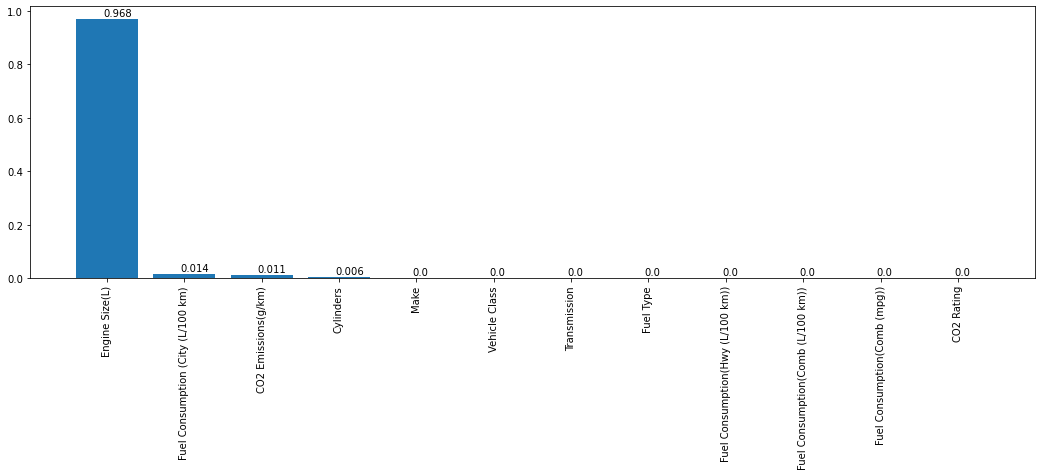

In [47]:
diagram, _ = draw_feature_importances(DeTree, data)

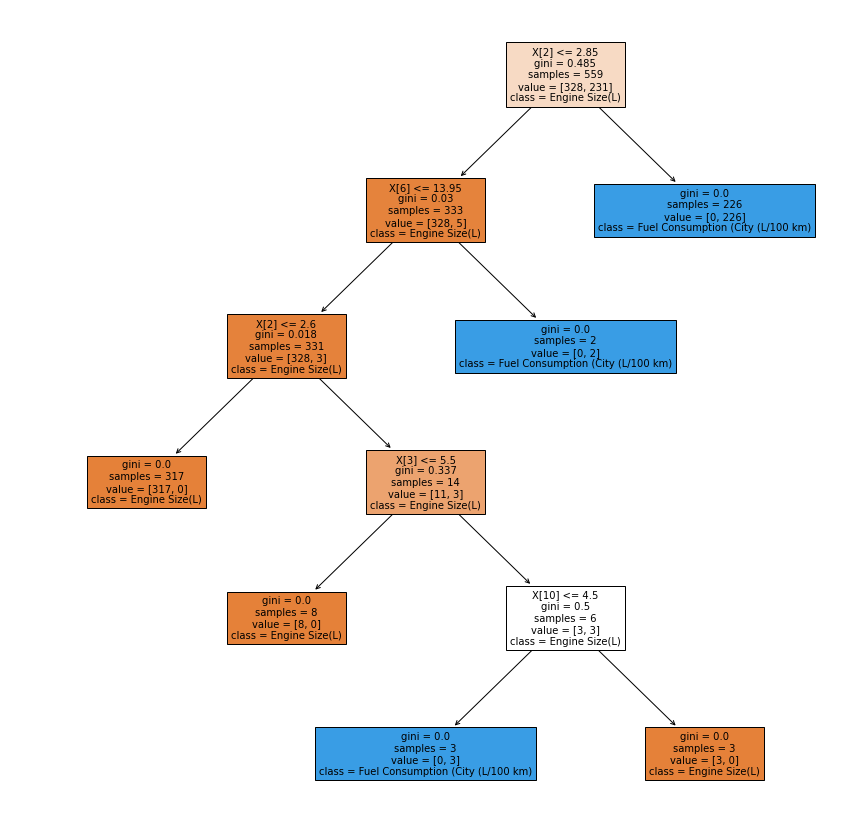

In [48]:
#Визуальное отображение дерева решений
fig, ax = plt.subplots(figsize=(15, 15))
cn=['Engine Size(L)', 'Fuel Consumption (City (L/100 km)', 'CO2 Emissions(g/km', 'Cylinders' ]
tree.plot_tree(DeTree, fontsize=10,class_names=cn, filled=True)
plt.show()